In [ ]:
# Run in Colab cell
!pip install xgboost shap joblib plotly scikit-learn pandas matplotlib seaborn --quiet

In [ ]:
import pandas as pd

# Create a small sample churn dataset
data = {
    'customerID': ['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male'],
    'SeniorCitizen': [0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
    'Partner': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No'],
    'Dependents': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes'],
    'tenure': [1, 34, 2, 45, 5, 20, 3, 50, 8, 12],
    'PhoneService': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'DSL', 'DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'DSL'],
    'Contract': ['Month-to-month', 'Two year', 'Month-to-month', 'One year', 'Month-to-month', 'Two year', 'Month-to-month', 'One year', 'Month-to-month', 'Two year'],
    'MonthlyCharges': [29.85, 56.95, 53.85, 42.30, 70.70, 99.65, 89.10, 29.75, 85.20, 60.00],
    'TotalCharges': [29.85, 1889.50, 108.15, 1840.75, 353.60, 1990.00, 267.30, 1510.50, 456.50, 720.00],
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Save to CSV file
df.to_csv("churn_dataset.csv", index=False)

print("✅ Sample churn dataset created as churn_dataset.csv")
df.head()


✅ Sample churn dataset created as churn_dataset.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,C001,Female,0,Yes,No,1,Yes,DSL,Month-to-month,29.85,29.85,No
1,C002,Male,1,No,No,34,Yes,Fiber optic,Two year,56.95,1889.50,No
2,C003,Female,0,No,Yes,2,No,DSL,Month-to-month,53.85,108.15,Yes
3,C004,Male,0,Yes,No,45,Yes,Fiber optic,One year,42.30,1840.75,No
4,C005,Female,1,No,No,5,Yes,DSL,Month-to-month,70.70,353.60,Yes


In [ ]:
import pandas as pd

# Load the dataset you just created
df = pd.read_csv("churn_dataset.csv")

# Show first 5 rows
print("📋 First few rows of the dataset:")
display(df.head())

# Check basic info
print("\nℹ️ Dataset Info:")
print(df.info())

# Check basic statistics
print("\n📊 Summary Statistics:")
display(df.describe())

# Check how many churned vs not churned
print("\n🔢 Churn Distribution:")
print(df['Churn'].value_counts())


📋 First few rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,C001,Female,0,Yes,No,1,Yes,DSL,Month-to-month,29.85,29.85,No
1,C002,Male,1,No,No,34,Yes,Fiber optic,Two year,56.95,1889.50,No
2,C003,Female,0,No,Yes,2,No,DSL,Month-to-month,53.85,108.15,Yes
3,C004,Male,0,Yes,No,45,Yes,Fiber optic,One year,42.30,1840.75,No
4,C005,Female,1,No,No,5,Yes,DSL,Month-to-month,70.70,353.60,Yes



ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       10 non-null     object 
 1   gender           10 non-null     object 
 2   SeniorCitizen    10 non-null     int64  
 3   Partner          10 non-null     object 
 4   Dependents       10 non-null     object 
 5   tenure           10 non-null     int64  
 6   PhoneService     10 non-null     object 
 7   InternetService  10 non-null     object 
 8   Contract         10 non-null     object 
 9   MonthlyCharges   10 non-null     float64
 10  TotalCharges     10 non-null     float64
 11  Churn            10 non-null     object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ KB
None

📊 Summary Statistics:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,10.000000,10.000000,10.000000,10.000000
mean,0.400000,18.000000,61.735000,916.615000
std,0.516398,18.523259,24.319312,798.214147
min,0.000000,1.000000,29.750000,29.850000
25%,0.000000,3.500000,45.187500,288.875000
50%,0.000000,10.000000,58.475000,588.250000
75%,1.000000,30.500000,81.575000,1758.187500
max,1.000000,50.000000,99.650000,1990.000000



🔢 Churn Distribution:
Churn
No     6
Yes    4
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the dataset you just created
df = pd.read_csv("churn_dataset.csv")

# Show first 5 rows
print("📋 First few rows of the dataset:")
display(df.head())

# Check basic info
print("\nℹ️ Dataset Info:")
print(df.info())

# Check basic statistics
print("\n📊 Summary Statistics:")
display(df.describe())

# Check how many churned vs not churned
print("\n🔢 Churn Distribution:")
print(df['Churn'].value_counts())


📋 First few rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,C001,Female,0,Yes,No,1,Yes,DSL,Month-to-month,29.85,29.85,No
1,C002,Male,1,No,No,34,Yes,Fiber optic,Two year,56.95,1889.50,No
2,C003,Female,0,No,Yes,2,No,DSL,Month-to-month,53.85,108.15,Yes
3,C004,Male,0,Yes,No,45,Yes,Fiber optic,One year,42.30,1840.75,No
4,C005,Female,1,No,No,5,Yes,DSL,Month-to-month,70.70,353.60,Yes



ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       10 non-null     object 
 1   gender           10 non-null     object 
 2   SeniorCitizen    10 non-null     int64  
 3   Partner          10 non-null     object 
 4   Dependents       10 non-null     object 
 5   tenure           10 non-null     int64  
 6   PhoneService     10 non-null     object 
 7   InternetService  10 non-null     object 
 8   Contract         10 non-null     object 
 9   MonthlyCharges   10 non-null     float64
 10  TotalCharges     10 non-null     float64
 11  Churn            10 non-null     object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ KB
None

📊 Summary Statistics:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,10.000000,10.000000,10.000000,10.000000
mean,0.400000,18.000000,61.735000,916.615000
std,0.516398,18.523259,24.319312,798.214147
min,0.000000,1.000000,29.750000,29.850000
25%,0.000000,3.500000,45.187500,288.875000
50%,0.000000,10.000000,58.475000,588.250000
75%,1.000000,30.500000,81.575000,1758.187500
max,1.000000,50.000000,99.650000,1990.000000



🔢 Churn Distribution:
Churn
No     6
Yes    4
Name: count, dtype: int64


In [ ]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



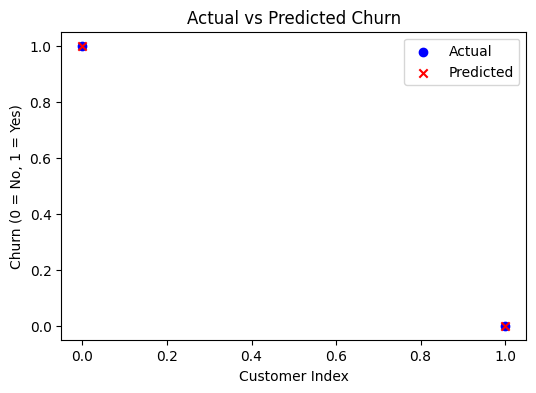

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted')
plt.title('Actual vs Predicted Churn')
plt.xlabel('Customer Index')
plt.ylabel('Churn (0 = No, 1 = Yes)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('churn_predictions.csv', index=False)
print("✅ File saved as churn_predictions.csv")


✅ File saved as churn_predictions.csv
